In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Arc
import math
import numpy as np
from matplotlib.pyplot import gca

In [7]:
def add_corner_arc(ax, line, radius=.7, color=None, text=None, text_radius=.5, text_rotatation=0, **kwargs):
    ''' display an arc for p0p1p2 angle
    Inputs:
        ax     - axis to add arc to
        line   - MATPLOTLIB line consisting of 3 points of the corner
        radius - radius to add arc
        color  - color of the arc
        text   - text to show on corner
        text_radius     - radius to add text
        text_rotatation - extra rotation for text
        kwargs - other arguments to pass to Arc
    '''

    lxy = line.get_xydata()

    if len(lxy) < 3:
        raise ValueError('at least 3 points in line must be available')

    p0 = lxy[0]
    p1 = lxy[1]
    p2 = lxy[2]

    width = np.ptp([p0[0], p1[0], p2[0]])
    height = np.ptp([p0[1], p1[1], p2[1]])

    n = np.array([width, height]) * 1.0
    p0_ = (p0 - p1) / n
    p1_ = (p1 - p1)
    p2_ = (p2 - p1) / n 

    theta0 = -get_angle(p0_, p1_)
    theta1 = -get_angle(p2_, p1_)

    if color is None:
        # Uses the color line if color parameter is not passed.
        color = line.get_color() 
    arc = ax.add_patch(Arc(p1, width * radius, height * radius, 0, theta0, theta1, color=color, **kwargs))

    if text:
        v = p2_ / np.linalg.norm(p2_)
        if theta0 < 0:
            theta0 = theta0 + 360
        if theta1 < 0:
            theta1 = theta1 + 360
        theta = (theta0 - theta1) / 2 + text_rotatation
        pt = np.dot(rotation_transform(theta), v[:,None]).T * n * text_radius
        pt = pt + p1
        pt = pt.squeeze()
        ax.text(pt[0], pt[1], text,         
                horizontalalignment='left',
                verticalalignment='top',)

    return arc    

def get_angle(p0, p1=np.array([0,0]), p2=None):
    ''' compute angle (in degrees) for p0p1p2 corner
    Inputs:
        p0,p1,p2 - points in the form of [x,y]
    '''
    if p2 is None:
        p2 = p1 + np.array([1, 0])
    v0 = np.array(p0) - np.array(p1)
    v1 = np.array(p2) - np.array(p1)

    angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
    return np.degrees(angle)

def rotation_transform(theta):
    ''' rotation matrix given theta
    Inputs:
        theta    - theta (in degrees)
    '''
    theta = np.radians(theta)
    A = [[np.math.cos(theta), -np.math.sin(theta)],
         [np.math.sin(theta), np.math.cos(theta)]]
    return np.array(A)

In [15]:
ax = gca()
line, = ax.plot([0, 0, 2], [-1, 0, 1], 'ro-', lw=2)
add_corner_arc(ax, line, text=u'%d\u00b0' % 90)

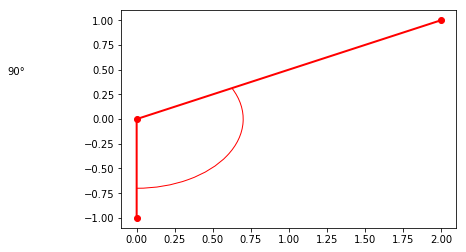

In [16]:
# plt.legend()
plt.show()